# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [6]:
# Importando as bibliotecas

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Carregando features.txt

variaveis = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\features.txt"
df_variaveis = pd.read_csv(variaveis, sep=' ', header=None)

# Carregando subject_train.txt

treino = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"
df_treino = pd.read_csv(treino, header=None)

# Carregando X_train.txt

treino_x = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
df_treino_x = pd.read_csv(treino_x, header=None, sep='\s+')

In [9]:
# Removendo a primeira coluna que ficou com o index duplicado

df_variaveis.drop(columns=0, inplace=True)

In [10]:
# Colocando as variáveis como coluna

df_treino_x.columns = df_variaveis

In [11]:
# Colocando a subject_train como uma nova coluna do dataframe

df_treino_x['subject_train'] = df_treino

In [12]:
# Resetando o index
# Quanop eu utilizo esta função eu crio uma nova coluna com o index anterior

df_treino_x.reset_index(inplace=True)

In [13]:
# Setando o index anterior e o subject_train como indice

df_treino_x = df_treino_x.set_index(['index', 'subject_train'])

In [14]:
df_treino_x.head()

,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
index,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [16]:
# Carregando a base de X_test.txt

teste_x = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt"
df_teste_x = pd.read_csv(teste_x, header=None, sep='\s+')

In [17]:
# Colocando as variáveis como coluna

df_teste_x.columns = df_variaveis

In [18]:
# Carregando o subject_test

teste = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt"
df_teste = pd.read_csv(teste, header=None)

In [19]:
# Colocando a subject_teste como uma nova coluna do dataframe

df_teste_x['subject_teste'] = df_teste

In [20]:
# Resetando o index
# Quanop eu utilizo esta função eu crio uma nova coluna com o index anterior

df_teste_x.reset_index(inplace=True)

In [21]:
# Setando o index anterior e o subject_train como indice

df_teste_x = df_teste_x.set_index(['index', 'subject_teste'])

In [22]:
df_teste_x.head()

,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
index,subject_teste,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [23]:
# Salvando os dataframes em csv

df_treino_x.to_csv('Treino_X.csv')
df_teste_x.to_csv('Teste_X.csv')

In [24]:
# Selecionando apenas as três primeiras colunas do dataframe

X_test = df_teste_x.iloc[:, :3]
X_train = df_treino_x.iloc[:, :3]

In [25]:
# Antes de passar para o próximo etapa do exercício irei importar a base de dados do y_train e y_test.

caminho_teste_y = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt"
caminho_treino_y = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"

y_train = pd.read_csv(caminho_treino_y, header=None)
y_test = pd.read_csv(caminho_teste_y, header=None)

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [26]:
# Treinando a árvore com no mínimo 20 observações por folha

clf = DecisionTreeClassifier(random_state=21, min_samples_leaf=20).fit(X_train, y_train)

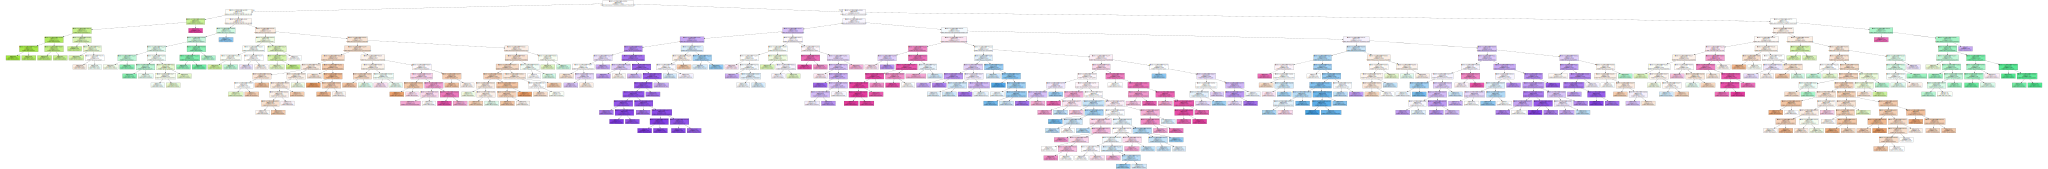

In [27]:
# Visualização da árvore de classificação

import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [29]:
# Cálculo de ccp_alphas

caminho = DecisionTreeClassifier(random_state=21).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [30]:
# Rodando uma árvore para cada ccp_alpha e salvando em uma lista

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=21, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

In [34]:
# Calculando a acurácia de cada árvore na base de treinamento e de teste

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

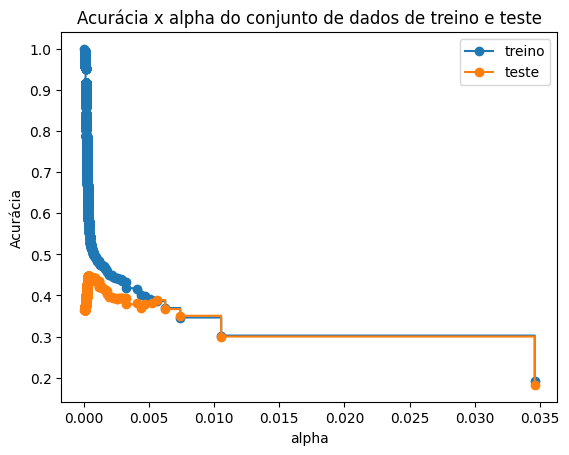

In [31]:
# Gráfico da acurácia em função do ccp_alpha, na base de teste e treino

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
# Selecionando a melhor árvore, aquela que possui a maior acurácia

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.00035561232685071484, random_state=21)

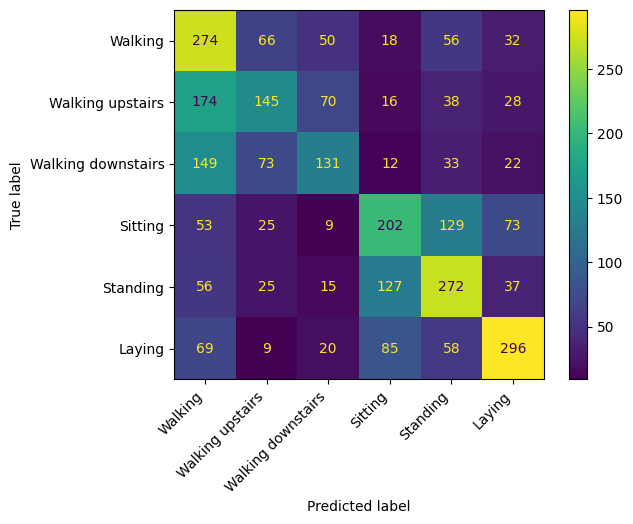

In [44]:
# PLot da matriz de confusão

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test, y_test, display_labels=['Walking', 'Walking upstairs', 'Walking downstairs', 'Sitting', 'Standing', 'Laying'])
plt.xticks(rotation=45, ha='right')
plt.show()

## Insights:

O modelo de árvore de classificação obtido teve uma acurácia de 0.448. Ou seja, a cada 1000 dados ele irá acertar 448.

Levando-se em consideração que para explicar o modelo foram utilizados apenas 3 variáveis, acredito que o modelo obteve um bom desempenho. Para afirmar isso com certeza teriam que ser realizadas mais modelagens com mais variáveis.

O modelo apresentou uma boa acurácia predizendo se a pessoa estava andando, de pé e descansando. Já para subindo escada, descendo escada e sentado, o modelo teve rendimento regular.